1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


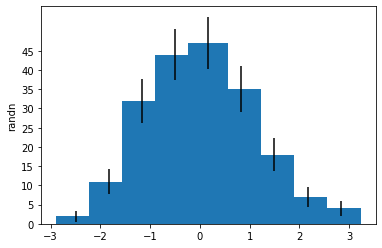

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

N = 200
sigma = 1
mu = 0
x = sigma*np.random.randn(N) + mu #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
y,binEdges,_ = plt.hist(x,bins="sturges") #https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width qua ci sono le alternative di default presenti in hist. sqrt e sturges sembrano funzionare bene
plt.ylabel("randn");
plt.yticks(np.arange(0,50,step=5));
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])#https://stackoverflow.com/questions/11774822/matplotlib-histogram-with-errorbars
errors = np.sqrt(y)
plt.bar(bincenters, y, yerr=errors);

In [ ]:
scipy.stats.norm()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [5]:
from IPython.display import Image
Image(url='https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png?dl=1')

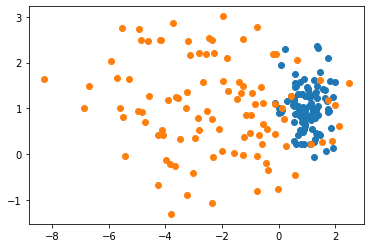

In [9]:
def obtain_2D_gaussian_sets(num_samples,num_categories,means,stds) :
    X = np.zeros((num_categories,num_samples,3)) #ci sono due features (gaussiane 2D) + l'etichetta (che assume un valore fra num_categories possibili); in più genero un dataset per categoria
    #print(X.shape)
    if means.shape[0] != num_categories or stds.shape[0] != num_categories :
        print("As many 2D means and stds must be provided as there are categories") #means, stds hanno tante righe quante sono le categorie e 2 colonne (gaussiane 2D-->mi servono mu_x,sigma_x,mu_y,sigma_y)
        return None
    for i in range(num_categories) : #una gaussiana 2D per categoria
        for j in range(2) : #x e y nel plot di cui sopra
            X[i][:,j] = stds[i][j]*np.random.randn(num_samples)+means[i][j]
        X[i][:,2] = i #l'ultima colonna di ciascun dataset contiene l'informazione sulla categoria
    return X

X = obtain_2D_gaussian_sets(100,2,np.array([[1,1],[-2,1]]),np.array([[0.5,0.5],[2,1]]))

plt.scatter(X[0][:,0],X[0][:,1]);
plt.scatter(X[1][:,0],X[1][:,1]);


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

linregress slope: 0.5779133666359263
linregress intercept: 10.025258299436526
r according to linregress: 0.04340351052255912


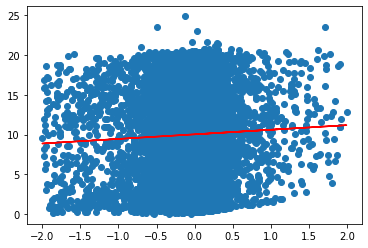

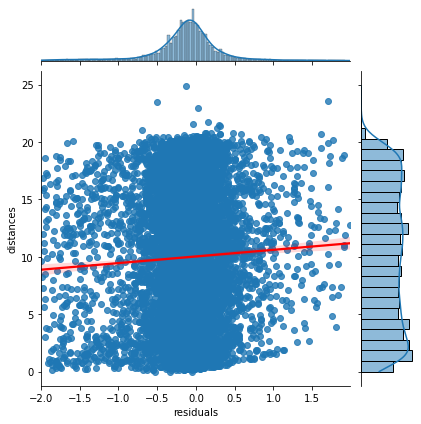

In [61]:
from IPython.display import display
from scipy.stats import linregress,binned_statistic
import seaborn as sbn

name = "residuals_261.npy"
#v=np.load(name,allow_pickle=True)#senza quell'opzione dà errore il caricamento di array è bloccato per motivi di sicurezza (pare)
data = pd.DataFrame(np.load(name,allow_pickle=True).item())
#display(data)
clean_data = data[np.abs(data["residuals"])<2]
#display(clean_data)

slope, intercept, r_value, p_value, std_err = linregress(clean_data["residuals"],clean_data["distances"])
plt.scatter(clean_data["residuals"],clean_data["distances"])
plt.plot(clean_data["residuals"],slope*clean_data["residuals"]+intercept,"r");
print("linregress slope:",slope)
print("linregress intercept:",intercept)
print("r according to linregress:",r_value)

sbn.jointplot(x="residuals",y="distances",data=clean_data,kind="reg",joint_kws={'line_kws':{'color':'red'}}); #https://stackoverflow.com/questions/31568874/how-to-change-the-line-color-in-seaborn-linear-regression-jointplot

In [62]:
z,binEdges = np.histogram(clean_data["distances"])
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])#vedi prima cella
x = bincenters
#forse si fa così, non ho capito bene la richiesta
y,_ = binned_statistic(clean_data["residuals"],clean_data["residuals"],bins=binEdges) #vedi https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic.html
erry,_ = binned_statistic(clean_data["residuals"],clean_data["residuals"],statistic="std",bins=binEdges)


ValueError: too many values to unpack (expected 2)